<a href="https://colab.research.google.com/github/YOOKJIN/ML-DL-Study/blob/main/practice_KNN_linearRegression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
perch_length  =  np.array ([ 8.4 , 13.7 , 15.0 , 16.2 , 17.4 , 18.0 , 18.7 , 19.0 , 19.6 , 20.0 , 21.0 ,
       21.0 , 21.0 , 21.3 , 22.0 , 22.0 , 22.0 , 22.0 , 22.0 , 22.5 , 22.5 , 22.7 ,
       23.0 , 23.5 , 24.0 , 24.0 , 24.6 , 25.0 , 25.6 , 26.5 , 27.3 , 27.5 , 27.5 ,
       27.5 , 28.0 , 28.7 , 30.0 , 32.8 , 34.5 , 35.0 , 36.5 , 36.0 , 37.0 , 37.0 ,
       39.0 , 39.0 , 39.0 , 40.0 , 40.0 , 40.0 , 40.0 , 42.0 , 43.0 , 43.0 , 43.5 ,
       44.0 ])
perch_weight  =  np.array ([ 5.9 , 32.0 , 40.0 , 51.5 , 70.0 , 100.0 , 78.0 , 80.0 , 85.0 , 85.0 , 110.0 ,
       115.0 , 125.0 , 130.0 , 120.0 , 120.0 , 130.0 , 135.0 , 110.0 , 130.0 ,
       150.0 , 145.0 , 150.0 , 170.0 , 225.0 , 145.0 , 188.0 , 180.0 , 197.0 ,
       218.0 , 300.0 , 260.0 , 265.0 , 250.0 , 250.0 , 300.0 , 320.0 , 514.0 ,
       556.0 , 840.0 , 685.0 , 700.0 , 700.0 , 690.0 , 900.0 , 650.0 , 820.0 ,
       850.0 , 900.0 , 1015.0 , 820.0 , 1100.0 , 1000.0 , 1100.0 , 1000.0 ,
       1000.0 ])

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [ ]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import  KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
distances, indexes = knr.kneighbors([[50]])

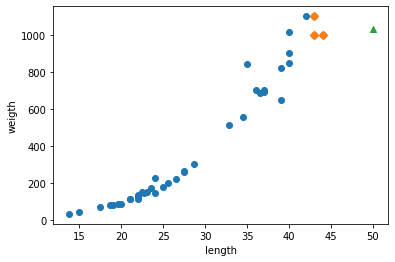

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


In [ ]:
#LinearRegression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


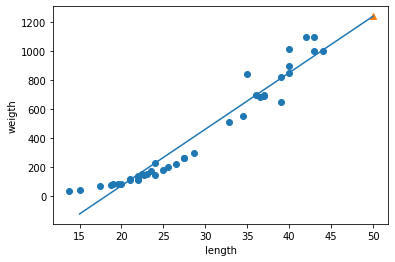

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


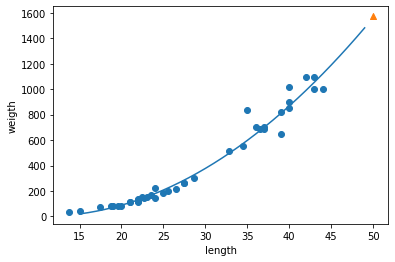

In [ ]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
